# Introduction

Copyright Australian Conservation Foundation (ACF). All rights reserved.<br>
Concept by Kim Garratt, Annica Schoor and the ACF 2021.<br>
Software developed by Ewan Short 2021. <br>
<eshort0401@gmail.com>, <https://github.com/eshort0401> <br>

This notebook provides some examples of the analyses the ACF may wish to conduct using `EPBC_database.csv`.  

# Setup

Load some data science modules and configure the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%load_ext autoreload
%autoreload 2

Specify the base directory for the project.

In [2]:
# base_dir = '' 

# Use default Windows base_directory.
if os.name == 'nt':
    base_dir = 'C:/Users/{}/'.format(os.getlogin())
    base_dir += 'Documents/EPBC_scrape/'

# Exploring the Database Using pandas

Load the EPBC database, and show a sample of its contents. 

In [4]:
table = pd.read_csv(base_dir + 'EPBC_database.csv', dtype=str)
table

,Reference Number,Title of referral,Notification from EPBC Act,Date of notice,PDF Attachments,Non PDF Attachments,Download,Registered Name,Type,ABN,ACN,Download Folder,PDFs Combined,Approval Holder,Industry,Holder Address,State,Description
0,2021/8977,Elizabeth Borrello/Commercial Development/Flyn...,Invitation for Public Comment on Referral,22/06/2021,Yes,No,Success,Fill manually.,Fill manually.,Fill manually.,Fill manually.,20218977_22062021_eb_ifpcor,Yes,Elizabeth Borrello,Commercial Development,"Flynn drive, Neerabup",Western Australia,Subdivision of Lot 902 Flynn Drive Neerabup fo...
1,2013/7098,JONES THEATRE UNIT TRUST/Residential Developme...,Notification of Variation to Approval,21/06/2021,Yes,No,Success,Fill manually.,Fill manually.,Fill manually.,Fill manually.,20137098_21062021_jtut_novta,Yes,JONES THEATRE UNIT TRUST,Residential Development,Busselton,Western Australia,"Residential development Lot 3, 500 Bussell Hig..."
2,2013/7098,JONES THEATRE UNIT TRUST/Residential Developme...,Notification of Extension of Period of Effect ...,21/06/2021,Yes,No,Success,Fill manually.,Fill manually.,Fill manually.,Fill manually.,20137098_21062021_jtut_noeopoeoa,Yes,JONES THEATRE UNIT TRUST,Residential Development,Busselton,Western Australia,"Residential development Lot 3, 500 Bussell Hig..."
3,2021/8910,Mt Fox Energy Park Pty Ltd/Energy Generation a...,Decision on Assessment Approach: Preliminary D...,18/06/2021,Yes,No,Success,MOUNT FOX ENERGY PARK PTY LTD (Confirm manually.),Australian Proprietary Company (Confirm manual...,39636341627 (Confirm manually.),636341627 (Confirm manually.),20218910_18062021_mfeppl_doaapd,Yes,Mt Fox Energy Park Pty Ltd,Energy Generation and Supply (renewable),", Mount Fox",Queensland,"Mt Fox Energy Park Wind Farm, QLD"
4,2021/8948,The Trustee for Manyana Property Trust/Residen...,Decision on Assessment Approach: Preliminary D...,18/06/2021,Yes,No,Success,Fill manually.,Fill manually.,Fill manually.,Fill manually.,20218948_18062021_ttfmpt_doaapd,Yes,The Trustee for Manyana Property Trust,Residential Development,approximately 0.5 km north of the township of ...,New South Wales,"North Manyana Subdivision, NSW"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,2019/8414,Essendon Airport Pty Ltd/Transport - Air and S...,s161- Advice required,22/03/2019,No,No,Not Applicable,ESSENDON AIRPORT PTY LTD,Australian Proprietary Company,47082907980,082907980,Not Applicable,Not Applicable,Essendon Airport Pty Ltd,Transport - Air and Space,Essendon Fields,Victoria,"ARC Commercial Office Development MDP, Essendo..."
2395,2017/8003,STEVENS HOLDINGS PTY LIMITED/Residential Devel...,Decision on approval of action: Approved with ...,22/03/2019,Yes,No,Success,STEVENS HOLDINGS PTY LIMITED,Australian Proprietary Company,14002386450,002386450,20178003_22032019_shpl_doaoaawc,Yes,STEVENS HOLDINGS PTY LIMITED,Residential Development,"Lot 99 DP 823635, Hickey Street, Iluka NSW 246...",New South Wales,"Iluka residential subdivision, Hickey Street, ..."
2396,2016/7704,Air Trunk Pty Ltd/Commercial Development/210 S...,Notification of Proposal Withdrawn,21/03/2019,No,No,Not Applicable,AIR TRUNK PTY LTD,Australian Proprietary Company,63604759462,604759462,Not Applicable,Not Applicable,Air Trunk Pty Ltd,Commercial Development,"210 Swann Drive, Derrimut",Victoria,"Industrial development, 210 Swann Drive, Derri..."
2397,2014/7133,KEPCO BYLONG AUSTRALIA PTY LTD/Mining/Bylong/N...,Reconsideration of Referral Determination: S78...,21/03/2019,Yes,No,Success,KEPCO BYLONG AUSTRALIA PTY LTD,Australian Proprietary Company,79075361769,075361769,20147133_21032019_kbapl_rordsrd,Yes,KEPCO BYLONG AUSTRALIA PTY LTD,Mining,Bylong,New South Wales,"Bylong Coal Project north east of Mudgee, NSW"


# Creating Plots using matplotlib

Count all the company types from the table. Ignore those not yet filled or confirmed.

In [5]:
holder_type = table.groupby('Type')['Type'].count()
holder_labels = holder_type.keys().values
holder_counts = holder_type.values
# Drop unfilled and uncomfirmed entries.
holder_labels = holder_labels[[0,2,5,6]]
holder_counts = holder_counts[[0,2,5,6]]

Generate a pie chart.

Text(0.5, 1.0, 'Total Referrals by Organisation Type')

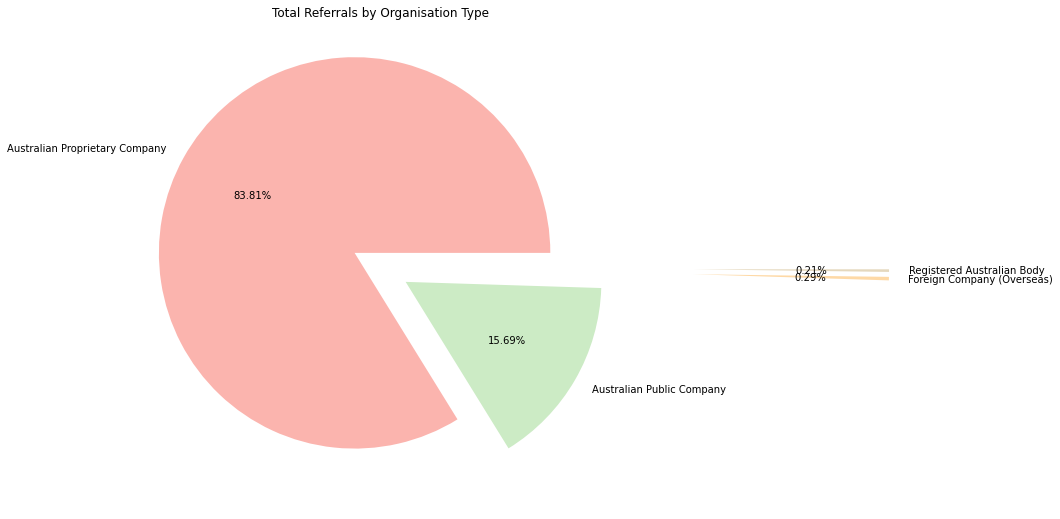

In [6]:
fig_app, ax_app = plt.subplots(figsize=(15, 9))
theme = plt.get_cmap('Pastel1')
ax_app.set_prop_cycle(
    "color", 
    [
        theme(1. * i / len(holder_counts))
         for i in range(len(holder_counts))])
plt.pie(
    holder_counts, labels=holder_labels, autopct='%1.2f%%', 
    explode=[.15, .15, 1.6, 1.6])
plt.title('Total Referrals by Organisation Type')